# This document will go through the pytorch tutorial page. It will include examples and projects conducted while learning the basics and more advanced abilities of pytorch.
## I am currently comming into this document with knowledge of using tensorflow. I recently purchased a AMD GPU and unfortunetly tensorflow keeps having issues with ROCm. Pytorch is doing much better with ROCm so transferring my learning to pytorch now.

* Initial basics will teach me how to use the FashionMNIST dataset, similar to what I did in tensorflow before
* Use one_like or rand_like to make a new tensor given another tensor

In [ ]:
import torch

torch.cuda.is_available()

Matrix multiplication uses torch.matmul

In [ ]:
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
# ``tensor.T`` returns the transpose of a tensor
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)

Single-element tensors If you have a one-element tensor, for example by aggregating all values of a tensor into one value, you can convert it to a Python numerical value using item():

In [ ]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

In-place operations Operations that store the result into the operand are called in-place. They are denoted by a _ suffix. For example: x.copy_(y), x.t_(), will change x.

In [ ]:
print(f"{tensor} \n")
tensor.add_(5)
print(tensor)

## Datasets & DataLoaders

* Decoupling training code from processing data samples is good code styling and can help with maintaining large code bases.
* Two primitives to use: torch.utils.data.DataLoader and torch.utils.data.Dataset

Datasets are used to store the samples and their labels while a Dataloader wraps an iterable arouind a Dataset to be accessed during training

In [ ]:
# Loading FashionMNIST DataSet
import torch
from torch.utils.data import Dataset
# Note that torchvision has the pre-availble datasets
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [ ]:
training_data = datasets.FashionMNIST(
    root="Data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="Data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [ ]:
class_map = {index:obj for index, obj in enumerate(training_data.classes)}
class_map

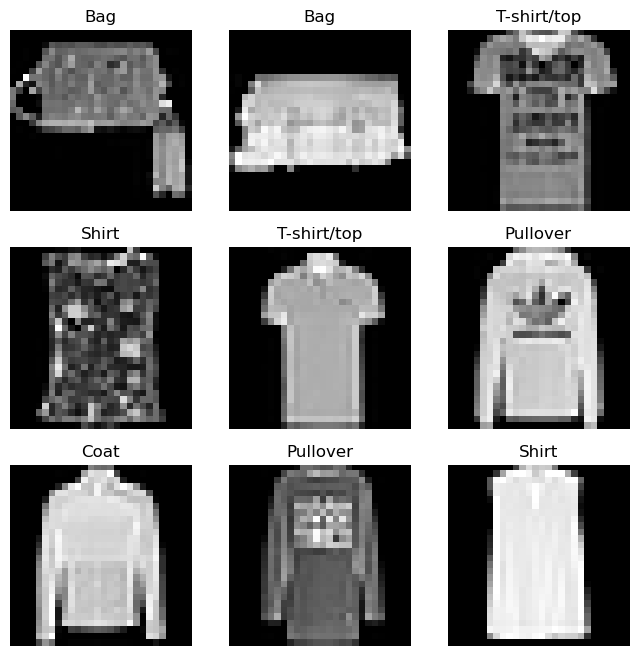

In [18]:
# Plotting 9 random samples from the dataset
figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3
## Starting at 1 because add_subplot is 1-based
for i in range(1, cols * rows + 1):
    random_sample_index = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[random_sample_index]
    figure.add_subplot(rows, cols, i)
    plt.title(class_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

Creating a Custom Dataset for your files